In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = np.matrix(pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mnist/mnist_train.csv', skiprows=1, header=None))

Y_train = dataset[:, 0]
Y_train = np.eye(10)[Y_train] # one hot

X_train = dataset[:, 1:]

print(X_train.shape)
print(Y_train.shape)

(60000, 784)
(60000, 1, 10)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_train = np.matrix(X_train)

print(X_train.shape)

(60000, 331)


In [0]:
lr = 0.01
epochs = 20
N = X_train.shape[0]
N = 600

D_in = X_train.shape[1]
D_H1 = 65
D_H2 = 15
D_out = 10

In [0]:
# xavier initialization
W1 = np.random.randn(D_H1, D_in) * np.sqrt(2 / (D_H1 + D_in))
W2 = np.random.randn(D_H2, D_H1) * np.sqrt(2 / (D_H2 + D_H1))
W3 = np.random.randn(D_out, D_H2) * np.sqrt(2 / (D_out + D_H2))

B1 = np.random.randn(D_H1 , 1)
B2 = np.random.randn(D_H2 , 1)
B3 = np.random.randn(D_out , 1)

In [0]:
from math import log

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def crossEntropy(y, y_hat):
    if y == 1:
      return -log(y_hat)
    else:
      return -log(1 - y_hat)

def softmaxGrad(a):
    # Reshape the 1-d softmax to 2-d
    s = a.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [0]:
errors = []

for epoch in range(epochs):

    epoch_errors = []

    for n in range(N):

        x = X_train[n,:].T
        y = Y_train[n,:].T

        # forward

        net1 = np.matmul(W1, x) + B1
        out1 = sigmoid(net1)

        net2 = np.matmul(W2, out1) + B2
        out2 = sigmoid(net2)

        net3 = np.matmul(W3, out2) + B3
        out3 = softmax(net3)
        y_hat = out3

        # bp

        error = 0
        for i in range(D_out):
            error += crossEntropy(y[i], y_hat[i])
        epoch_errors.append(error)

        grad_out3 = y - y_hat
        grad_net3 = np.matmul(softmaxGrad(out3), grad_out3)
        grad_W3 = np.matmul(grad_net3, out2.T)
        grad_B3 = grad_net3

        grad_out2 = np.matmul(W3.T, grad_net3)
        grad_net2 = np.multiply(grad_out2, np.multiply(out2 , (1 - out2)))
        grad_W2 = np.matmul(grad_net2, out1.T)
        grad_B2 = grad_net2

        grad_out1 = np.matmul(W2.T, grad_net2)
        grad_net1 = np.multiply(grad_out1, np.multiply(out1, (1 - out1)))
        grad_W1 = np.matmul(grad_net1, x.T)
        grad_B1 = grad_net1

        # update

        W1 = W1 + lr * grad_W1
        W2 = W2 + lr * grad_W2
        W3 = W3 + lr * grad_W3

        B1 = B1 + lr * grad_B1
        B2 = B2 + lr * grad_B2
        B3 = B3 + lr * grad_B3

    errors.append(sum(epoch_errors) / N)

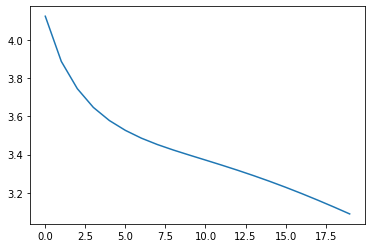

In [8]:
errors = np.array(errors)
errors = errors.reshape(epochs, 1)

plt.plot(errors)
plt.show()